In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)
warnings.filterwarnings("ignore",category = FutureWarning)

In [9]:
df = pd.read_csv("diabetes.csv")

In [12]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

In [15]:
X_train, X_test , y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.30,
                                                     random_state = 42)

In [18]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [28]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [30]:
y_pred = gbm_model.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.7489177489177489

In [34]:
gbm = GradientBoostingClassifier()

In [36]:
gbm_params = {"learning_rate" : [0.1,0.01,0.001,0.05],
              "n_estimators" :[100,300,500,1000],
              "max_depth" : [2,3,5,8]
             }

In [38]:
gbm_cv_model = GridSearchCV(gbm,gbm_params, cv=10,
                            verbose=2,
                            n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_

In [40]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [42]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.01 , max_depth = 5 , n_estimators = 500).fit(X_train,y_train)

In [44]:
y_pred = gbm_tuned.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.7402597402597403

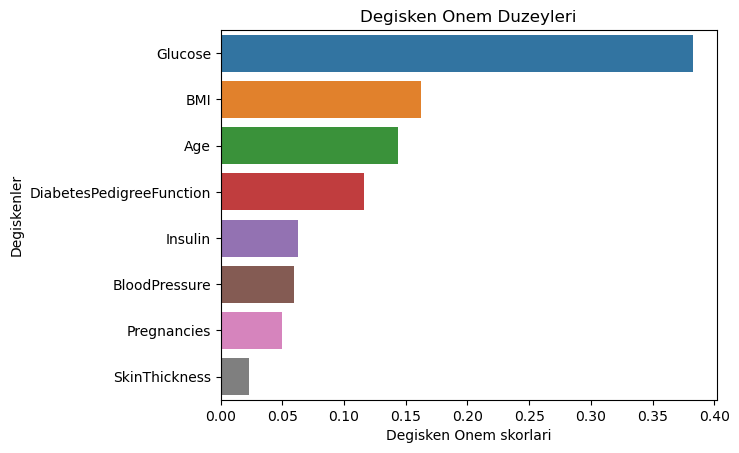

In [49]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel("Degisken Onem skorlari")
plt.ylabel("Degiskenler")
plt.title("Degisken Onem Duzeyleri")
plt.show()              

# XGBoost

In [52]:
!pip install xgboost

In [54]:
from xgboost import XGBClassifier

In [56]:
xgb_model = XGBClassifier().fit(X_train,y_train)

In [58]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [60]:
y_pred = xgb_model.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred)

0.7142857142857143

In [64]:
xgb = XGBClassifier()

In [66]:
xgb_params = {"n_estimators" : [100,500,1000],
              "subsample" : [0.6,0.8,1],
              "max_depth" : [3,5,7],
              "learning_rate" : [0.1,0.001,0.01]}

In [68]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,verbose=2,n_jobs = -1 ,cv=10).fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] EN

In [70]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}

In [72]:
xgb_tuned = XGBClassifier(learning_rate=0.01,max_depth=3,n_estimators=500,subsample=0.8).fit(X_train,y_train)

In [74]:
y_pred = xgb_tuned.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred)

0.7619047619047619

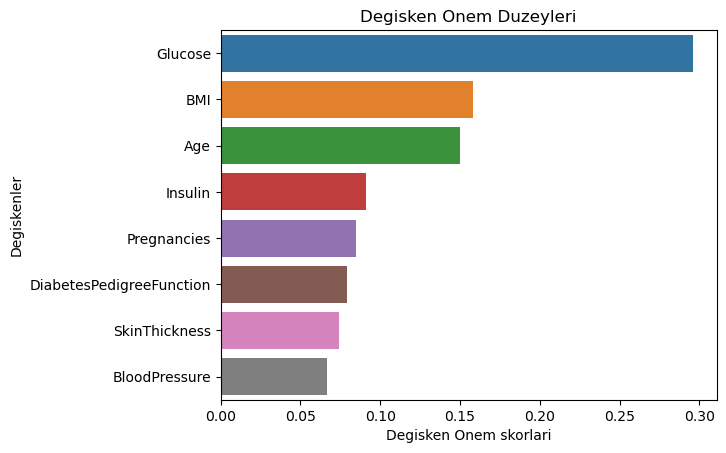

In [78]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel("Degisken Onem skorlari")
plt.ylabel("Degiskenler")
plt.title("Degisken Onem Duzeyleri")
plt.show()              